# Dataset Structure & Class Count

In [4]:
# Identify valid class folders (non-empty image directories)
class_names = []

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    
    if not os.path.isdir(folder_path):
        continue
    
    image_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    
    if len(image_files) > 0:
        class_names.append(folder)

print(f"Number of classes: {len(class_names)}")
print("Classes:", class_names)


Number of classes: 15
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [5]:
# Count number of images per class
class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(DATASET_PATH, class_name)
    image_files = [
        f for f in os.listdir(class_dir)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    class_counts[class_name] = len(image_files)

# Display class counts
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


Pepper__bell___Bacterial_spot: 997
Pepper__bell___healthy: 1478
Potato___Early_blight: 1000
Potato___healthy: 152
Potato___Late_blight: 1000
Tomato_Bacterial_spot: 2127
Tomato_Early_blight: 1000
Tomato_healthy: 1591
Tomato_Late_blight: 1909
Tomato_Leaf_Mold: 952
Tomato_Septoria_leaf_spot: 1771
Tomato_Spider_mites_Two_spotted_spider_mite: 1676
Tomato__Target_Spot: 1404
Tomato__Tomato_mosaic_virus: 373
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208


In [7]:
# Convert counts to Counter for easier analysis
class_distribution = Counter(class_counts)

# Summary statistics
min_samples = min(class_distribution.values())
max_samples = max(class_distribution.values())

print(f"Minimum samples in a class: {min_samples}")
print(f"Maximum samples in a class: {max_samples}")


Minimum samples in a class: 152
Maximum samples in a class: 3208


##### Display Sample Images per Class

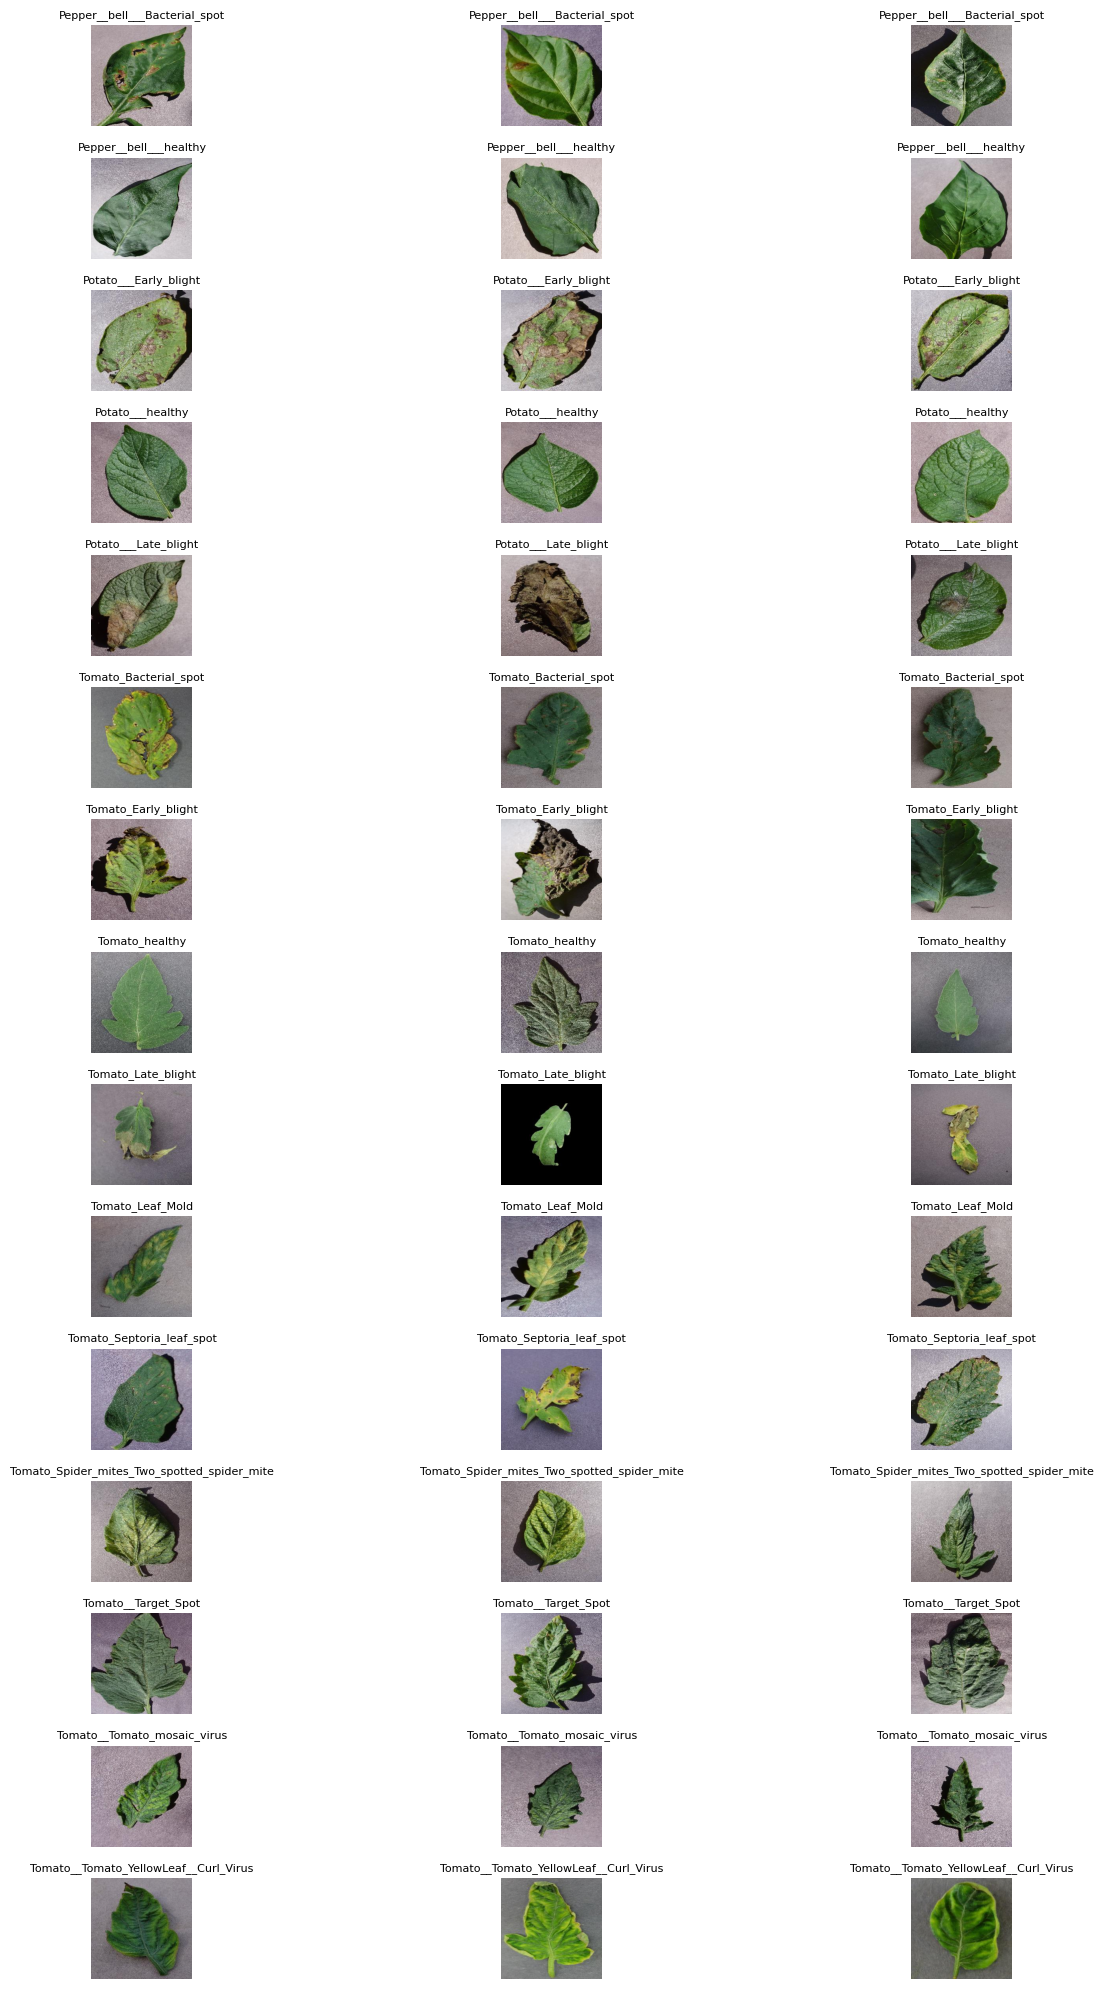

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

SAMPLES_PER_CLASS = 3

plt.figure(figsize=(15, 20))
plot_idx = 1

for class_name in class_names:
    class_dir = os.path.join(DATASET_PATH, class_name)
    
    # list all images in class folder
    image_files = [
        f for f in os.listdir(class_dir)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    
    # randomly sample images for visualization
    sampled_images = random.sample(
        image_files,
        min(SAMPLES_PER_CLASS, len(image_files))
    )
    
    for img_name in sampled_images:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        
        # plot images in a grid layout
        plt.subplot(len(class_names), SAMPLES_PER_CLASS, plot_idx)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name, fontsize=8)
        
        plot_idx += 1

plt.tight_layout()

# save figure before rendering
plt.savefig("../results/plots/sample_images_per_class.png", dpi=300)

plt.show()


##### Collect Image Shapes

In [12]:
import numpy as np

image_shapes = []  # store (width, height) of sampled images

# limit samples per class to keep EDA fast
MAX_IMAGES_PER_CLASS = 50

for class_name in class_names:
    class_dir = os.path.join(DATASET_PATH, class_name)
    
    # collect image files for the class
    image_files = [
        f for f in os.listdir(class_dir)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    
    sampled_images = image_files[:MAX_IMAGES_PER_CLASS]
    
    for img_name in sampled_images:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        
        # PIL size returns (width, height)
        image_shapes.append(img.size)


##### Analyze Dimensions

In [13]:
# separate widths and heights for analysis
widths = [w for w, h in image_shapes]
heights = [h for w, h in image_shapes]

# check resolution range across dataset
print(f"Min width: {min(widths)}, Max width: {max(widths)}")
print(f"Min height: {min(heights)}, Max height: {max(heights)}")


Min width: 256, Max width: 256
Min height: 256, Max height: 256


##### Plot Size Distribution

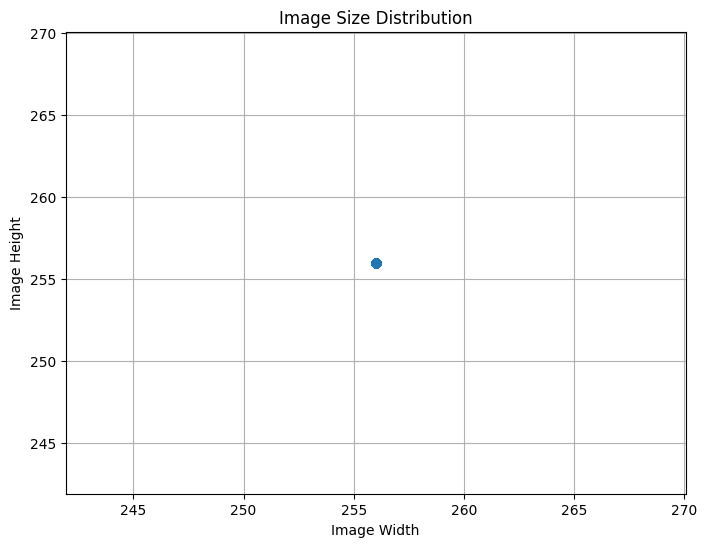

In [14]:
# visualize variation in image resolutions
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.4)

plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Size Distribution")
plt.grid(True)

# save plot for reproducibility
plt.savefig("../results/plots/image_size_distribution.png", dpi=300)
plt.show()


##### Channel Check

In [15]:
from collections import Counter

channel_counts = Counter()

for class_name in class_names:
    class_dir = os.path.join(DATASET_PATH, class_name)
    
    image_files = [
        f for f in os.listdir(class_dir)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    
    # inspect one sample image per class
    img_path = os.path.join(class_dir, image_files[0])
    img = Image.open(img_path)
    
    # count image color modes
    channel_counts[img.mode] += 1

print(channel_counts)


Counter({'RGB': 15})


##### Verify splits in notebook

In [17]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data_loader import collect_image_paths, stratified_split
from collections import Counter

DATASET_PATH = "../data/raw/PlantVillage"

image_paths, labels = collect_image_paths(DATASET_PATH)

X_train, y_train, X_val, y_val, X_test, y_test = stratified_split(
    image_paths, labels
)

print("Train:", Counter(y_train))
print("Val:", Counter(y_val))
print("Test:", Counter(y_test))


Train: Counter({'Tomato__Tomato_YellowLeaf__Curl_Virus': 2245, 'Tomato_Bacterial_spot': 1489, 'Tomato_Late_blight': 1336, 'Tomato_Septoria_leaf_spot': 1240, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1173, 'Tomato_healthy': 1114, 'Pepper__bell___healthy': 1035, 'Tomato__Target_Spot': 983, 'Potato___Late_blight': 700, 'Tomato_Early_blight': 700, 'Potato___Early_blight': 700, 'Pepper__bell___Bacterial_spot': 698, 'Tomato_Leaf_Mold': 666, 'Tomato__Tomato_mosaic_virus': 261, 'Potato___healthy': 106})
Val: Counter({'Tomato__Tomato_YellowLeaf__Curl_Virus': 481, 'Tomato_Bacterial_spot': 319, 'Tomato_Late_blight': 286, 'Tomato_Septoria_leaf_spot': 265, 'Tomato_Spider_mites_Two_spotted_spider_mite': 251, 'Tomato_healthy': 239, 'Pepper__bell___healthy': 222, 'Tomato__Target_Spot': 211, 'Potato___Early_blight': 150, 'Tomato_Early_blight': 150, 'Potato___Late_blight': 150, 'Pepper__bell___Bacterial_spot': 150, 'Tomato_Leaf_Mold': 143, 'Tomato__Tomato_mosaic_virus': 56, 'Potato___healthy': 23})